# Practice

### Q1. Binary Search Tree Implementation

Implement a binary search tree that has the following three methods:
- search method
- insert method
- delete method

First two methods are provided for you, so implement the delete method.
<br>
Complete the delete, deleteHelp, and findMax function. 

- (1) Base case – case that returns a variable or constant value
- (2) Recursive case – case that uses the function being defined or another function again

#### Solution

In [1]:
class TreeNode():
    def __init__(self, x:int):
        self.val = x
        self.left = None
        self.right = None

In [24]:
class BST():
    def __init__(self, root:TreeNode) -> None:
        self.root = root
        
    def __searchHelp(self, curNode: TreeNode, x: int) -> TreeNode:
        # (1) Base Case
        if not curNode:
            return None
        if x == curNode.val:
            return curNode
        
        # (2) Recursive case
        if x < curNode.val:
            return self.__searchHelp(curNode.left, x)
        else:
            return self.__searchHelp(curNode.right, x)
        
    def search(self, x:int) -> TreeNode:
        return self.__searchHelp(self.root, x)
    
    def __insertHelp(self, curNode: TreeNode, x: int) -> TreeNode:
        # (1) Base Case
        if not curNode:
            return TreeNode(x)
        if x == curNode.val:
            return curNode
        
        # (2) Recursive case
        if x < curNode.val:
            curNode.left = self.__insertHelp(curNode.left, x)
        else: 
            curNode.right = self.__insertHelp(curNode.right, x)
        
        return curNode
    
    def insert(self, x: int) -> None:
        self.root = self.__insertHelp(self.root, x)
    
    def __findMax(self, curNode: TreeNode) -> int:
        # (1) Base Case
        # When you can't move more to the right, return the value of curNode
        ### Write you code here ###
        if not curNode.right: 
            return curNode.val
        ### End of your code ###
        # (2) Recursive Case
        # When you can move more to the right, keep looking for the node with max value
        ### Write you code here ###
        else:
            return self.__findMax(curNode.right)
        ### End of your code ###
    
    # Scan through a subtree which has curNode as its root, 
    # and return a new (if necessary) root
    def __deleteHelp(self, curNode: TreeNode, x: int) -> TreeNode:
            
        # (1) Base Case
        if not curNode:
            return None

        # (2) Recursive Case
        if x < curNode.val:
            curNode.left =  self.__deleteHelp(curNode.left, x)
            # delete x from curNode's left,
            # and replace its left node with a new (if necessary) root of left subtree

        elif x > curNode.val:
            # delete x from curNode's right,
            # and replace its left node with a new (if necessary) root of right subtree
            ### Write code here ###
            curNode.right = self.__deleteHelp(curNode.right, x)

            ### End of your code ###


        else: # x == curNode.val
            # (1) No child
            if not curNode.left and not curNode.right :
                return None

            # (2) One child
            elif not curNode.left:
                return curNode.right
            elif not curNode.right:
                return curNode.left

            else :
                maxLeft = self.__findMax(curNode.left)
                curNode.val = maxLeft
                curNode.left = self.__deleteHelp(curNode.left, maxLeft)
            # (3)  Two children
            # delete curNode by replacing itself with the node that has either
            # [a] the biggest value from its left subtree, or
            # [b] the smallest value from its right subtree
            # Here, choose and implement method [a]
        return curNode
                # (1) Base Case
        ### Write code here ###
        if not curNode:
            return None
        ### End of your code ###
        
        # (2) Recursive Case
        if x < curNode.val:
            # delete x from curNode's left,
            # and replace its left node with a new (if necessary) root of left subtree
            ### Write code here ###
            curNode.left = self.__deleteHelp(curNode.left, x)
            ### End of your code ###

        elif x > curNode.val:
            # delete x from curNode's right,
            # and replace its left node with a new (if necessary) root of right subtree
            ### Write code here ###
            curNode.right = self.__deleteHelp(curNode.right, x)
            ### End of your code ###

        else: # x == curNode.val
            # (1) No child
            ### Write code here ###
            if (not curNode.left) and (not curNode.right):
                return None
            ### End of your code ###
            
            # (2) One child
            ### Write code here ###
            elif (not curNode.left) or (not curNode.right):
                if curNode.left:
                    return curNode.left
                else:
                    return curNode.right
            ### End of your code ###
            
            # (3)  Two children
            # delete curNode by replacing itself with the node that has either
            # [a] the biggest value from its left subtree, or
            # [b] the smallest value from its right subtree
            # Here, choose and implement method [a]
            ### Write code here ###
            curNode.val = self.__findMax(curNode)
            curNode.right = self.__deleteHelp(curNode.right, curNode.val) = self.__deleteHelp(curNode.right, curNode.val)
            ### End of your code ###
        return curNode
    
        
        
    def delete(self, x:int) -> None:
        # root may change when some node is erased 
        self.root = self.__deleteHelp(self.root, x)

SyntaxError: cannot assign to function call (3675660788.py, line 100)

In [20]:
tree1 = TreeNode(1)
tree2 = TreeNode(2)
tree3 = TreeNode(3)
tree4 = TreeNode(4)
tree5 = TreeNode(5)
tree6 = TreeNode(6)
tree7 = TreeNode(7)

tree4.left = tree2
tree4.right = tree6

tree2.left = tree1
tree2.right = tree3

tree6.left = tree5
tree6.right = tree7

# Instance of class BST, setting node with value of 4 as its root
myTree = BST(tree4)

In [21]:
# Test search
node = myTree.search(6)
if node == None:
    print(node)
else:
    print(node, node.val)

<__main__.TreeNode object at 0x000001C24B2DCD30> 6


In [22]:
# Test insert
myTree.insert(8)
node = myTree.search(8)
if node == None:
    print(node)
else:
    print(node, node.val)

<__main__.TreeNode object at 0x000001C24B283820> 8


In [23]:
# Test delete - 1
print("root:", myTree.root.val)
myTree.delete(4)
print("new root:", myTree.root.val)

root: 4
new root: 3


In [16]:
# Test delete - 2
print("Is there node with the value of 4?")
node = myTree.search(4)
if node == None:
    print(node)
else:
    print(node, node.val)

Is there node with the value of 4?
None


In [17]:
# Test delete - 3
print("Is there node with the value of 3?")
node = myTree.search(3)
if node == None:
    print(node)
else:
    print(node, node.val)

Is there node with the value of 3?
<__main__.TreeNode object at 0x000001C24A163CD0> 3


In [18]:
# Test delete - 4
print(myTree.root.left.val)
print(myTree.root.right.val)

2
6


# In-class Exercise

### Q2. Sum of subtree in BST

Complete a function that returns sum of all the BST node values within the range [low, high]
- Each node of BST is defined by TreeNode class, which is defined in BST_Helper.py file. printTree() Method returns a list of all nodes in the tree.
- Input: Root Node of BST, low, high
- Each node values are unique in the BST.
- To test if your function is correct, use create_linked_bst function defined in BST_Helper.py file. It creates a BST with an input of integer list, and returns the root node. The input list has to be in a certain sequence: first element is the value of the root node, second is the value of left node of the root, third is the value of right node of the root, ... Also, if there is no node input None. For example, create_linked_bst([10,5,15,3,7,None,18]) creates below BST and returns the root node.
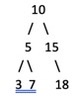

- You should not use the method of summing up the values in a list, without using the characteristic of BST. To prevent this, the input may be given to you in a way that the condition of BST child is violated. Originally, current node's left value has to be smaller than current value, while the right value has to be bigger than current value. Here, we do not apply this rule to grand children. For example, BST below may be given to you. 9 is smaller than 10 but it is located at the right subtree of node with value 9. Refer to example 1 and 2 for the calculation of these kind of BSTs.
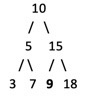

Ex1) root = create_linked_bst([10,5,15,3,7, 9, 18]); P1(root, 3, 9)
- output: 15
- explanation: 3,5,7 is within the range, so it returns the sum of 15. Numerically, 9 is within the range too, but when we search BST, 9 is the maximum value within the range, thus we only scan through the left subtree of the root.

Ex2) root = create_linked_bst([10,5,15,3,7, 9, 18]); P1(root, 3, 15)
- output: 49
- explanation: 3, 5, 7, 9, 10, 15 is within the range, so it returns the sum of 49. The maximum value within the range is 15 and it's bigger than the root node value. Thus, we should search both left and right subtrees, and 9 should be included in the sum.

Ex3) root = create_linked_bst ([10,5,15,3,7,13,18,1,None,6]); P1(root, 6, 10)
- output: 23
- explanation: 6, 7, 10 is within the range, so it should return the sum of 23.

#### Solution

In [10]:
import BST_Helper
from BST_Helper import *

ModuleNotFoundError: No module named 'BST_Helper'

In [ ]:
def P1(root: TreeNode, low: int, high: int) -> int:

    
    return ans

: 

In [ ]:
root = create_linked_bst([10,5,15,3,7, 9, 18])
P1(root, 3, 9)

: 

In [ ]:
root = create_linked_bst([10,5,15,3,7, 9, 18])
P1(root, 3, 15)

: 

In [ ]:
root = create_linked_bst ([10,5,15,3,7,13,18,1,None,6])
P1(root, 6, 10)

: 

: 